In [3]:
import pandas as pd

In [4]:
df = pd.read_csv('data/netflow/CIDDS-001/traffic/preprocessed.csv', index_col='DATE')

df.head()

,DURATION,PROTOCOL,SRC_IP_ADDR,SRC_PORT,DST_IP_ADDR,DST_PORT,PACKETS,BYTES,TOS,ATTACK_TYPE,...,FLAG_0xdf,FLAG_0xda,FLAG_0x52,FLAG_0xd3,FLAG_0x5b,FLAG_0x5a,FLAG_0xd2,FLAG_0xde,FLAG_0x53,FLAG_0xc6
DATE,,,,,,,,,,,,,,,,,,,,,
2017-03-14 17:43:26.135,81504.787,3,43440,8,44022,8,8639,9318.4,0,0,...,0,0,0,0,0,0,0,0,0,0
2017-03-14 17:43:26.135,81504.787,3,43441,8,44021,8,12024,10547.2,0,0,...,0,0,0,0,0,0,0,0,0,0
2017-03-14 17:43:26.135,81504.787,3,43441,8,44021,8,12024,10547.2,0,0,...,0,0,0,0,0,0,0,0,0,0
2017-03-14 17:43:26.135,81504.787,3,43440,8,44022,8,8639,9318.4,0,0,...,0,0,0,0,0,0,0,0,0,0
2017-03-14 17:43:39.011,183418.493,3,43441,8,44021,8,20751,5939.2,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
X, y = df.drop('ATTACK_TYPE', axis=1), df['ATTACK_TYPE'].to_numpy()

In [6]:
print(X.shape)
print(len(y))

(11653215, 29)
11653215


In [9]:
import os, sys
sys.path.append(os.path.join(os.path.dirname('notebooks'), '..'))

from models import random, procedural1, procedural2, procedural3
from metrics import accuracy, confusion_matrix, recall

In [10]:
baselines = [random, procedural1, procedural2, procedural3]

In [11]:
metrics = [accuracy, confusion_matrix, recall]

In [12]:
from sklearn.model_selection import train_test_split

**** Random Baseline ****
	 Accuracy Score: 0.19957711241060944
	 Confusion Matrix:
	 Recall: 0.19988003310674352
**** ****
**** Procedural Baseline based on IP addresses and protocols ****
	 Accuracy Score: 0.8425245736906082
	 Confusion Matrix:
	 Recall: 0.8425219992937572
**** ****
**** Procedural Baseline based on IP addresses and TOS ****
	 Accuracy Score: 0.8424507743142129
	 Confusion Matrix:
	 Recall: 0.8424507743142129
**** ****
**** Random Baseline ****
	 Accuracy Score: 0.8424507743142129
	 Confusion Matrix:
	 Recall: 0.8424507743142129
**** ****


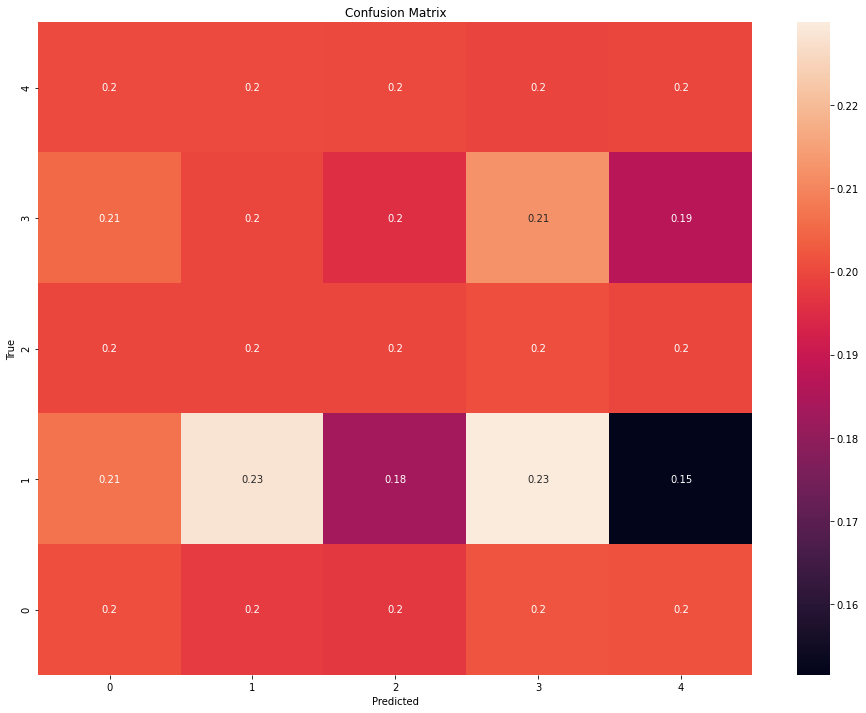

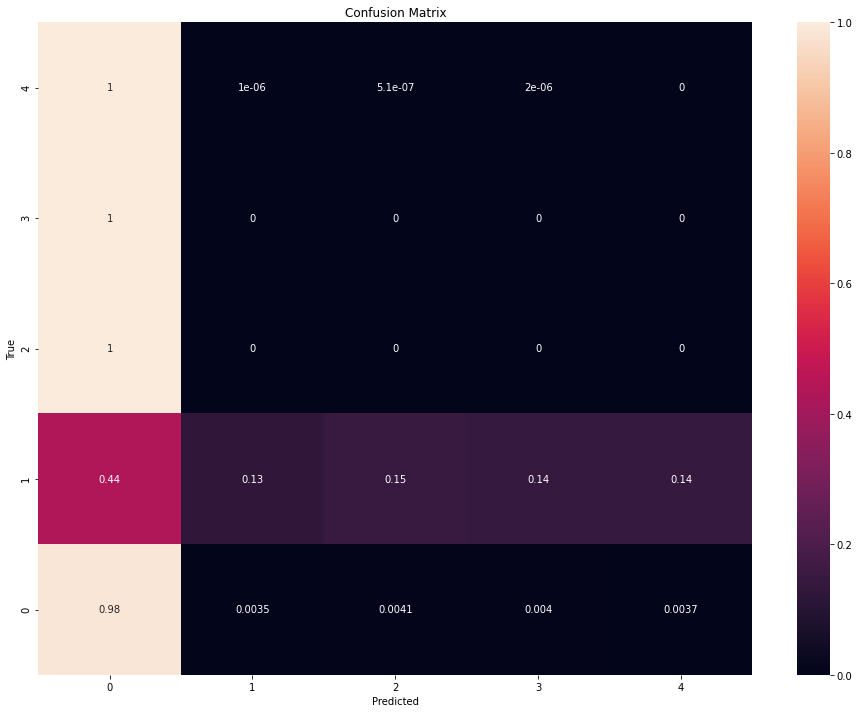

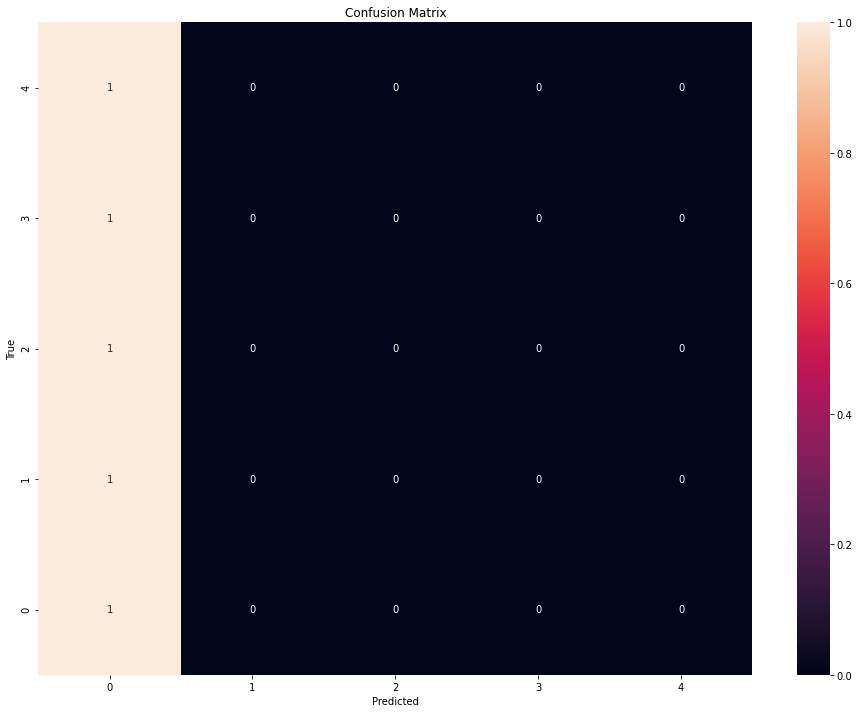

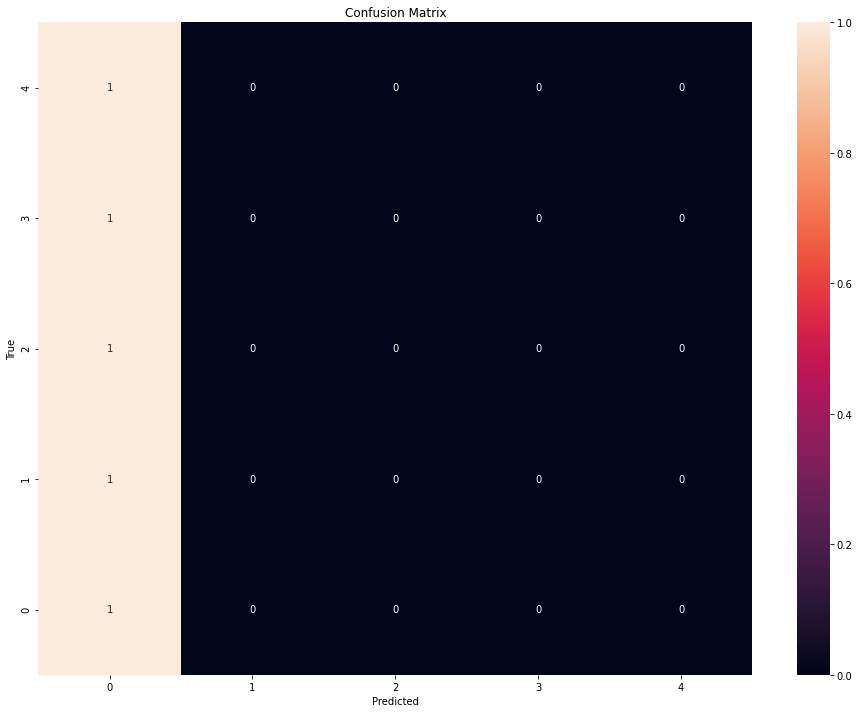

In [15]:
for model in baselines:
    
    print("**** {} ****".format(model.name))
    _, X_test, _, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    for metric in metrics:
        metric_name = metric.name
    
        if metric_name == 'Confusion Matrix':
            print("\t {}:".format(metric_name))
            _ = metric.plot(Y_true=y_test, Y_predicted=model.predict(X_test), labels=[0, 1, 2, 3, 4])
            
        else:
            print("\t {}: {}".format(metric_name, metric.evaluate(Y_true=y_test, Y_predicted=model.predict(X_test))))
        
    print("**** ****")